<a href="https://colab.research.google.com/github/dmnarula/football-ds-learning/blob/main/week3-visualization/Week3_Projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# %cd /content
# !rm -rf football-ds-learning
# !git clone https://github.com/dmnarula/football-ds-learning.git

/content
Cloning into 'football-ds-learning'...
remote: Enumerating objects: 265, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 265 (delta 21), reused 0 (delta 0), pack-reused 197 (from 2)
Receiving objects: 100% (265/265), 5.14 MiB | 13.96 MiB/s, done.
Resolving deltas: 100% (116/116), done.


In [9]:
# %cd football-ds-learning
# !ls

/content/football-ds-learning
fonts	   sample_data	week1-python-basics  week3-visualization
README.md  src		week2-pandas	     week4-modeling


In [84]:
import pandas as pd
import shutil
import os
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.font_manager import FontProperties
from matplotlib.patches import Rectangle
from src.fonts import register_font, set_plot_style
!pip install adjustText

In [88]:
FONTS = set_plot_style()

In [13]:
url = "https://raw.githubusercontent.com/dmnarula/football-ds-learning/refs/heads/main/week3-visualization/data/pl_data_gw14_25_26_full.csv"
df = pd.read_csv(url)

df.head()

,id,status,chance_of_playing_next_round,chance_of_playing_this_round,now_cost,now_cost_rank,now_cost_rank_type,cost_change_event,cost_change_event_fall,cost_change_start,...,direct_freekicks_text,penalties_text,saves_per_90,clean_sheets_per_90,goals_conceded_per_90,starts_per_90,defensive_contribution_per_90,tackles,clearances_blocks_interceptions,recoveries
0,1,a,NaN,NaN,5.9,94,1.0,0,0.0,4,...,NaN,NaN,1.5,0.57,0.50,1.0,0.00,0,11,111
1,2,a,NaN,NaN,4.2,607,37.0,0,0.0,-3,...,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0,0,0
2,3,u,0.0,0.0,4.0,649,56.0,0,0.0,0,...,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0,0,0
3,4,a,NaN,NaN,3.9,736,87.0,0,0.0,-1,...,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0,0,0
4,5,i,0.0,0.0,6.3,72,2.0,0,0.0,3,...,NaN,NaN,0.0,0.64,0.45,1.0,9.09,12,88,15


In [14]:
df_small = df[[
    "id",
    "web_name",
    "minutes",
    "goals_scored",
    "assists",
    "expected_goals",
    "expected_assists",
    "expected_goal_involvements",
    "expected_goals_conceded",
    "defensive_contribution_per_90",
    "starts",
    "yellow_cards",
    "red_cards",
    "saves",
    "penalties_missed",
    "goals_conceded",
    "own_goals",
    "clean_sheets"
]].copy()

df_small.head()

,id,web_name,minutes,goals_scored,assists,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,defensive_contribution_per_90,starts,yellow_cards,red_cards,saves,penalties_missed,goals_conceded,own_goals,clean_sheets
0,1,Raya,1260,0,0,0.00,0.04,0.04,7.38,0.00,14,1,0,21,0,7,0,8
1,2,Arrizabalaga,0,0,0,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0
2,3,Hein,0,0,0,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0
3,4,Setford,0,0,0,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0
4,5,Gabriel,990,1,2,0.82,0.69,1.51,6.17,9.09,11,1,0,0,0,5,0,7


In [15]:
df_small["GI"] = df_small["goals_scored"] + df_small["assists"]

df_small = df_small.rename(columns={
    "expected_goal_involvements": "xGI",
})


df_small[["web_name", "GI", "xGI", "minutes"]]

,web_name,GI,xGI,minutes
0,Raya,0,0.04,1260
1,Arrizabalaga,0,0.00,0
2,Hein,0,0.00,0
3,Setford,0,0.00,0
4,Gabriel,3,1.51,990
...,...,...,...,...
753,Hee Chan,1,0.99,413
754,André,0,0.37,973
755,Cox,0,0.00,0
756,Fitzgerald,0,0.00,0


In [16]:
df_clean = df_small[df_small["minutes"] >= 300].copy()

df_clean.shape

(314, 19)

In [17]:
top_xg = df_clean.sort_values("xGI", ascending=False).head(9)

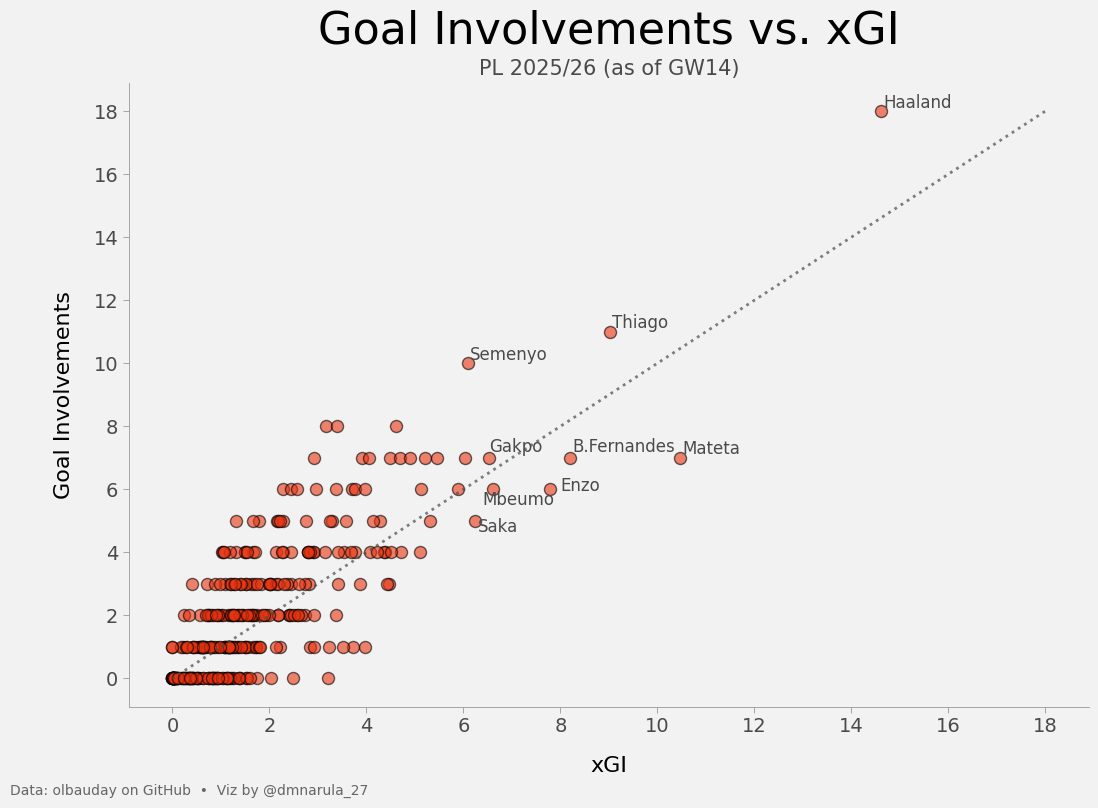

In [18]:
# Making scatter plot

from adjustText import adjust_text

# Size
plt.figure(figsize=(12,8), facecolor="#f2f2f2")

# Scatter plot
plt.scatter(
    df_clean["xGI"],
    df_clean["GI"],
    alpha=0.6,
    s=75,
    edgecolor="black",
    c="#e83410"
)

# Diagonal line
max_val = max(df_clean["xGI"].max(), df_clean["GI"].max())
plt.plot([0, max_val], [0, max_val],
         color="#4a4a4a",
         linestyle=":",
         linewidth=2,
         alpha=0.7,
         solid_capstyle="round"
         )

# Labels
plt.xlabel("xGI", fontsize=16,labelpad=14)
plt.ylabel("Goal Involvements", fontsize=16, labelpad=14)
plt.title("Goal Involvements vs. xGI", fontsize=32, pad=28)
plt.suptitle("PL 2025/26 (as of GW14)",
             fontsize=15,
             y=0.91,
             c="#4a4a4a"
             )

# Axes
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_color("#999999")
ax.spines["left"].set_color("#999999")
ax.spines["left"].set_linewidth(0.6)
ax.spines["bottom"].set_linewidth(0.6)
ax.set_facecolor("#f2f2f2")
ax.tick_params(
    axis='both',
    length=4,
    width=0.6,
    color="#999999",
    labelsize=14
)

# Axis increment
plt.xticks(range(0, int(max_val)+1, 2), fontsize=14, c="#4a4a4a")
plt.yticks(range(0, int(max_val)+1, 2), fontsize=14, c="#4a4a4a")

# Spacing
plt.subplots_adjust(
    left=0.1,
    right=0.9,
    bottom=0.1
)

# Dot labels
texts = []

for _, row in top_xg.iterrows():
    texts.append(
        plt.text(
            row["xGI"],
            row["GI"],
            row["web_name"],
            fontsize=12,
            color="#4a4a4a"
        )
    )

adjust_text(
    texts,
    ax=ax
)

plt.figtext(
    0.001, -0.01,
    "Data: olbauday on GitHub  •  Viz by @dmnarula_27",
    ha="left",
    fontsize=10,
    color="#666666"
)


plt.show()


In [19]:
import seaborn as sns
import numpy as np
from matplotlib.patches import Rectangle
import os

# Function to build reusable merge pipeline
def build_match_df(url_stats, url_players, url_teams, url_matches):
    # Load raw data
    df_stats   = pd.read_csv(url_stats)
    df_players = pd.read_csv(url_players)
    df_teams   = pd.read_csv(url_teams)
    df_matches = pd.read_csv(url_matches)

    # Keep certain columns
    player_cols = ["player_code", "player_id", "web_name", "team_code", "position"]
    team_cols   = ["code", "name", "short_name"]
    match_cols  = ["gameweek", "home_team", "away_team",
                   "match_id", "home_score", "away_score"]

    df_players = df_players[player_cols].copy()
    df_teams   = df_teams[team_cols].copy()
    df_matches = df_matches[match_cols].copy()

    # Fix type mismatch
    df_matches["home_team"] = (
        pd.to_numeric(df_matches["home_team"], errors="coerce")
          .round()
          .astype("Int64")
    )
    df_matches["away_team"] = (
        pd.to_numeric(df_matches["away_team"], errors="coerce")
          .round()
          .astype("Int64")
    )
    df_teams["code"] = (
        pd.to_numeric(df_teams["code"], errors="coerce")
          .round()
          .astype("Int64")
    )
    df_matches["home_score"] = (
        pd.to_numeric(df_matches["home_score"], errors="coerce")
          .round()
          .astype("Int64")
    )
    df_matches["away_score"] = (
        pd.to_numeric(df_matches["away_score"], errors="coerce")
          .round()
          .astype("Int64")
    )

    # Merge stats + players
    df_sp = df_stats.merge(
        df_players,
        on="player_id",
        how="left"
    )

    # Merge in match info
    df_spm = df_sp.merge(
        df_matches,
        on="match_id",
        how="left"
    )

    # Home team
    df_spmh = df_spm.merge(
        df_teams,
        left_on="home_team",
        right_on="code",
        how="left"
    ).rename(columns={
        "name": "home_team_name",
        "short_name": "home_team_short_name"
    }).drop(columns=["code"])

    # Away team
    df_spmha = df_spmh.merge(
        df_teams,
        left_on="away_team",
        right_on="code",
        how="left"
    ).rename(columns={
        "name": "away_team_name",
        "short_name": "away_team_short_name"
    }).drop(columns=["code"])

    # Player team
    df_final = df_spmha.merge(
        df_teams,
        left_on="team_code",
        right_on="code",
        how="left"
    ).rename(columns={
        "name": "team_name",
        "short_name": "team_short_name"
    }).drop(columns=["code"])

    return df_final

In [20]:
# Function to build urls for a specific week
def get_gw_urls(gw: int):
  gw_path = "https://raw.githubusercontent.com/olbauday/FPL-Elo-Insights/refs/heads/main/data/2025-2026/By%20Tournament/Premier%20League/GW"
  url_stats = f"{gw_path}{gw}/playermatchstats.csv"
  url_players = f"{gw_path}{gw}/players.csv"
  url_teams = f"{gw_path}{gw}/teams.csv"
  url_matches = f"{gw_path}{gw}/matches.csv"
  return url_stats, url_players, url_teams, url_matches

In [21]:
# Load gameweek data into stats and players
url_stats, url_players, url_teams, url_matches = get_gw_urls(15)

df_final = build_match_df(url_stats, url_players, url_teams, url_matches)
df_matches = pd.read_csv(url_matches)
df_matches.head()

,gameweek,kickoff_time,home_team,home_team_elo,home_score,away_score,away_team,away_team_elo,finished,match_id,...,away_walking_distance,home_running_distance,away_running_distance,home_sprinting_distance,away_sprinting_distance,home_number_of_sprints,away_number_of_sprints,home_top_speed,away_top_speed,tournament
0,15.0,2025-12-06T17:30:00,2.0,1718.70,3.0,3.0,14.0,1917.61,True,25-26-prem-leeds-united-vs-liverpool,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,prem
1,15.0,2025-12-07T16:30:00,54.0,1775.79,1.0,2.0,31.0,1837.82,True,25-26-prem-fulham-vs-crystal-palace,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,prem
2,15.0,2025-12-06T12:30:00,7.0,1890.53,2.0,1.0,3.0,2038.72,True,25-26-prem-aston-villa-vs-arsenal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,prem
3,15.0,2025-12-06T15:00:00,11.0,1797.06,3.0,0.0,17.0,1773.69,True,25-26-prem-everton-vs-nottingham-forest,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,prem
4,15.0,2025-12-06T15:00:00,91.0,1796.38,0.0,0.0,8.0,1896.87,True,25-26-prem-afc-bournemouth-vs-chelsea,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,prem


In [22]:
# Final cleaning
stats_cols = ["minutes_played", "goals", "assists",
              "total_shots", "xg", "xa", "shots_on_target"]
player_cols = ["player_code", "player_id", "web_name", "team_code", "position"]
match_cols  = ["gameweek", "home_team", "away_team",
                "match_id", "home_score", "away_score",
               "home_team_name", "home_team_short_name",
               "away_team_name", "away_team_short_name"]
team_cols   = ["team_name", "team_short_name"]

df_final_clean = df_final[stats_cols + player_cols + team_cols + match_cols]
df_final_clean.head()

,minutes_played,goals,assists,total_shots,xg,xa,shots_on_target,player_code,player_id,web_name,...,gameweek,home_team,away_team,match_id,home_score,away_score,home_team_name,home_team_short_name,away_team_name,away_team_short_name
0,90,0,1,1,0.09,0.04,0,226944,58,Kamara,...,15.0,7,3,25-26-prem-aston-villa-vs-arsenal,2,1,Aston Villa,AVL,Arsenal,ARS
1,90,0,0,0,0.00,0.00,0,98980,32,Martinez,...,15.0,7,3,25-26-prem-aston-villa-vs-arsenal,2,1,Aston Villa,AVL,Arsenal,ARS
2,87,1,0,2,0.23,0.02,1,199796,36,Cash,...,15.0,7,3,25-26-prem-aston-villa-vs-arsenal,2,1,Aston Villa,AVL,Arsenal,ARS
3,90,0,0,2,0.15,0.13,1,204480,21,Rice,...,15.0,7,3,25-26-prem-aston-villa-vs-arsenal,2,1,Aston Villa,AVL,Arsenal,ARS
4,79,0,0,4,0.57,0.31,2,223340,16,Saka,...,15.0,7,3,25-26-prem-aston-villa-vs-arsenal,2,1,Aston Villa,AVL,Arsenal,ARS


In [23]:
# Team colors
team_colors = {
    "ARS": "#EF0107",   # Arsenal
    "AVL": "#670E36",   # Aston Villa
    "BOU": "#DA291C",   # Bournemouth
    "BRE": "#EF2B2D",   # Brentford
    "BHA": "#0057B8",   # Brighton
    "CHE": "#034694",   # Chelsea
    "CRY": "#1B458F",   # Crystal Palace
    "EVE": "#003399",   # Everton
    "FUL": "#000000",   # Fulham
    "LEE": "#FFCD00",   # Leeds United (yellow)
    "LIV": "#C8102E",   # Liverpool
    "MCI": "#6CABDD",   # Man City
    "MUN": "#DA291C",   # Man Utd
    "NEW": "#241F20",   # Newcastle
    "NFO": "#DD0000",   # Nottingham Forest
    "SUN": "#E03A3E",   # Sunderland (red)
    "TOT": "#132257",   # Tottenham
    "WHU": "#7A263A",   # West Ham
    "WOL": "#FDB913",   # Wolves
    "BUR": "#6C1D45"    # Burnley (claret)
}

In [63]:
# Match Analysis Player xG vs. xA

# Automating chart combinations
if os.path.exists("match_figs"):
  shutil.rmtree("match_figs")

os.makedirs("match_figs", exist_ok=True)

def plot_match_xg_xa(match_id):
  match_df = df_final_clean[
      (df_final_clean["match_id"] == match_id) &
      (df_final_clean["minutes_played"] > 0) &
      (df_final_clean["position"] != "Goalkeeper")
  ]
  if match_df.empty:
    return

  # Building scatterplot

  plt.figure(figsize=(16,9), facecolor="#f2f2f2")

  # Dot colors
  custom_colors = {
      team: team_colors.get(team, "#999999")
      for team in match_df["team_short_name"].unique()
  }

  sns.scatterplot(
      data=match_df,
      x="xg",
      y="xa",
      s=100,
      alpha=1,
      hue="team_short_name",
      palette=custom_colors,
      edgecolor="black"
  )

  # Labels and legend
  gw = match_df['gameweek'].iloc[0].astype(int)
  ax = plt.gca()
  match_subtitle = f"{match_df['home_team_name'].iloc[0]} ({match_df["home_score"].iloc[0]} - {match_df["away_score"].iloc[0]}) {match_df['away_team_name'].iloc[0]} (GW{gw})"
  ax.set_xlabel("xG", fontproperties=axis_font, labelpad=18)
  ax.set_ylabel("xA", fontproperties=axis_font, labelpad=18)
  ax.set_title("Expected Attacking Output",
               fontproperties=title_font,
               pad=50)
  ax.text(
      0.5, 1.02,           # x, y relative to the axes (0–1 range)
      match_subtitle,
      ha="center",
      va="bottom",
      alpha=0.6,
      transform=ax.transAxes,
      fontproperties=subtitle_font   # your Montserrat Medium font
  )
  leg = ax.legend(title=None,
                  frameon=True,
                  prop=dot_label_font,
                  bbox_to_anchor=(1, 1),
                  loc="upper left")

  # Axes
  ax = plt.gca()
  ax.tick_params(
      axis='both',
      which='both',
      length=4,
      width=0.6,
      color="#888888"
  )
  for tick in ax.get_xticklabels():
    tick.set_fontproperties(tick_font)
  for tick in ax.get_yticklabels():
    tick.set_fontproperties(tick_font)

  # Locking x and y axis max - no empty space expansion
  x_min, x_max = ax.get_xlim()
  y_min, y_max = ax.get_ylim()

  ax.set_xlim(x_min, match_df["xg"].max() * 1.1)
  ax.set_ylim(y_min, match_df["xa"].max() * 1.1)

  x_min, x_max = ax.get_xlim()
  y_min, y_max = ax.get_ylim()


  # Set tick increments
  plt.xticks(np.arange(round(x_min, 0), round(x_max, 1), max(((x_max + x_min)/5).round(1), 0.1)))
  plt.yticks(np.arange(round(y_min, 0), round(y_max, 1), max(((y_max + y_min)/5).round(1), 0.1)))

  # Dot labels
  texts=[]
  split = 0.4
  # At least 0.1 xG or 0.1 xA
  label_df = match_df[(match_df["xg"] > 0.1) | (match_df["xa"] > 0.1)]
  for _, row in label_df.iterrows():
      x = row["xg"]
      y = row["xa"]

      texts.append(
          ax.text(
              x + 0.01,
              y - 0.004,
              row["web_name"],
              fontproperties=dot_label_font
          )
      )

  # Misc text
  plt.figtext(
      0.04, -0.01,
      "Data: olbauday (GitHub)  •  @dmnarula_27",
      ha="left",
      fontproperties=footer_font,
      color="#666666"
  )

  # Remove top and right border
  sns.despine()

  # Lines
  if (match_df["xg"].max() >= split) or (match_df["xa"].max() >= split):

    plt.axvline(x=split, color="#e0a81b", linestyle=":", linewidth=2, alpha=0.8)
    plt.axhline(y=split, color="#e0a81b", linestyle=":", linewidth=2, alpha=0.8)

    # Quadrant shading & text

    # Top right - elite
    if x_max > split and y_max > split:
      ax.add_patch(Rectangle(
          (split, split),
          x_max - split,
          y_max - split,
          facecolor="#e0a81b",
          alpha=0.1,
          edgecolor="none"
      ))

      elite_x = (split + x_max) / 2
      elite_y = (split + y_max) / 2
      ax.text(
          elite_x, elite_y,
          "Elite",
          ha="center", va="center",
          fontproperties=label_font,
          color="#e0a81b",
          alpha=0.8
      )

    # Top left - creative
    if x_min < split and y_max > split:
      ax.add_patch(Rectangle(
          (x_min, split),
          split - x_min,
          y_max - split,
          facecolor="#999999",
          alpha=0.1,
          edgecolor="none"
      ))

      creative_x = (x_min + split) / 2
      creative_y = (split + y_max) / 2
      ax.text(
          creative_x, creative_y,
          "Creative",
          ha="center", va="center",
          fontproperties=label_font,
          color="#999999",
          alpha=0.9
      )

    # Bottom right - threat
    if x_max > split and y_min < split:
      ax.add_patch(Rectangle(
          (split, y_min),
          x_max - split,
          split - y_min,
          facecolor="#999999",
          alpha=0.1,
          edgecolor="none"
      ))

      threat_x = (split + x_max) / 2
      threat_y = (y_min + split) / 2
      ax.text(
          threat_x, threat_y,
          "Threat",
          ha="center", va="center",
          fontproperties=label_font,
          color="#999999",
          alpha=0.9
      )

  adjust_text(
      texts,
      arrowprops=dict(arrowstyle="-", color="gray", lw=0.6)
  )

  save_title = f"{match_df['home_team_short_name'].iloc[0]}-vs-{match_df['away_team_short_name'].iloc[0]}_xg_xa_gw{gw}.png"

  plt.savefig(
      os.path.join("match_figs", save_title),
      dpi=300,
      bbox_inches="tight",
      facecolor=plt.gcf().get_facecolor()
    )

  # plt.close()
  plt.show()







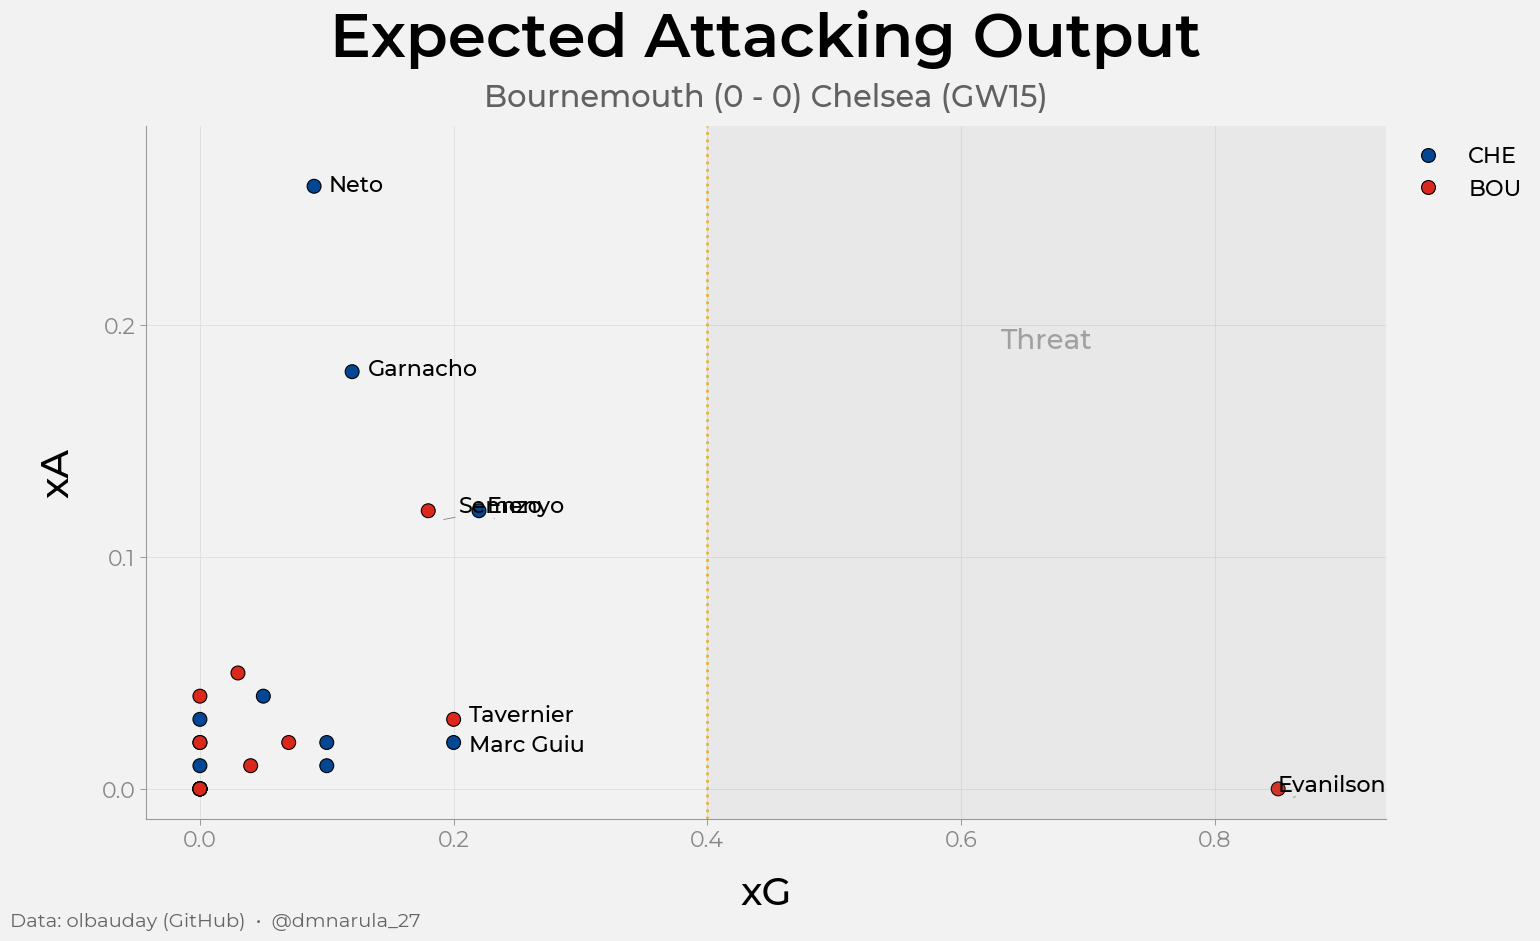

In [64]:
plot_match_xg_xa("25-26-prem-afc-bournemouth-vs-chelsea")

In [26]:
# Looping through all match IDs

# for mid in match_ids:
#   plot_match_xg_xa(mid)


In [27]:
# Zip and download
# import shutil
# from google.colab import files


# gw = df_final_clean['gameweek'].iloc[0].astype(int)

# zip_name = f"match_xg_xa_GW{gw}"
# shutil.make_archive(zip_name, "zip", "match_figs")
# files.download(f"{zip_name}.zip")

In [28]:
# For X post

def categorize_players(df, split=0.4):
    elite = df[(df["xg"] >= split) & (df["xa"] >= split)]["web_name"].tolist()
    creative = df[(df["xg"] < split) & (df["xa"] >= split)]["web_name"].tolist()
    threat = df[(df["xg"] >= split) & (df["xa"] < split)]["web_name"].tolist()
    return elite, creative, threat

results = {}

for mid in match_ids:
    df_match = df_final_clean[
      (df_final_clean["match_id"] == mid) &
      (df_final_clean["minutes_played"] > 0) &
      (df_final_clean["position"] != "Goalkeeper")
         ]
    elite, creative, threat = categorize_players(df_match)
    results[mid] = {
        "elite": elite,
        "creative": creative,
        "threat": threat
    }

results


NameError: name 'match_ids' is not defined